In [14]:
#Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

In [15]:
# read dataset
pdy=pd.read_csv("iris.csv")
print("Dataset : \n" ,pdy)

Dataset : 
      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setos
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [16]:
#applying label encoding
label_encoder =LabelEncoder()
pdy['species']= label_encoder.fit_transform(pdy['species'])

In [17]:
# Distinguish dependent and independent variables
x=pdy.iloc[:,:-1]
y=pdy.iloc[:,-1]

print("Independent variables are : \n",x)
print("Dependent variables are : \n",y)

Independent variables are : 
      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Dependent variables are : 
 0      1
1      1
2      1
3      1
4      0
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int32


In [18]:
# split test and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)


Dependent test dataset : 
 128    3
18     1
130    3
105    3
107    3
78     2
83     2
14     1
5      1
133    3
25     1
11     1
12     1
63     2
113    3
34     1
60     2
2      1
24     1
123    3
35     1
124    3
68     2
26     1
29     1
19     1
41     1
16     1
20     1
101    3
84     2
47     1
108    3
1      1
93     2
144    3
125    3
92     2
86     2
46     1
135    3
7      1
65     2
10     1
132    3
Name: species, dtype: int32

 Dependent prediction values :
[3 1 3 3 3 2 3 1 1 3 1 1 1 2 3 1 2 1 1 3 1 3 2 1 1 1 1 1 1 3 2 1 3 1 2 3 3
 2 2 1 3 1 2 1 3]

Confusion Matrix for entropy : 
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Accuracy by entropy:  0.9777777777777777

Classification report for entropy : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.90      1.00      0.95         9
           3       1.00      0.93      0.97        15

    accuracy                           0.98 

Text(0.5, 1.0, 'Decision Tree using Entropy')

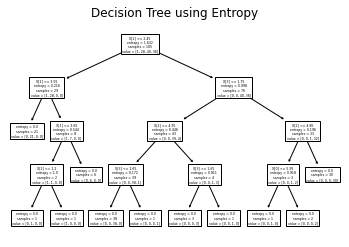

In [20]:
dt=DecisionTreeClassifier(criterion="entropy", random_state=4)
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"\nDependent test dataset : \n {y_test}\n\n Dependent prediction values :\n{y_pred}")
print("\nConfusion Matrix for entropy : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy by entropy: ",accuracy_score(y_pred,y_test))
print("\nClassification report for entropy : \n",classification_report(y_pred,y_test))
print(plot_tree(dt))
plt.title('Decision Tree using Entropy')


Confusion Matrix for gini : 
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]

Accuracy by gini :  0.9777777777777777

Classification report for gini : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.90      1.00      0.95         9
           3       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[Text(0.39705882352941174, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [1, 28, 40, 36]'), Text(0.11764705882352941, 0.7, 'X[1] <= 3.55\ngini = 0.067\nsamples = 29\nvalue = [1, 28, 0, 0]'), Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0]'), Text(0.17647058823529413, 0.5, 'X[1] <= 3.65\ngini = 0.219\nsamples = 8\nvalue = [1, 7, 0, 0]'), Text(0.11764705882352941, 0.3, 'X[2] <= 1.2\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0]')

Text(0.5, 1.0, 'Decision Tree using Gini')

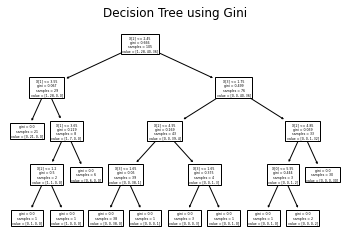

In [13]:
dt=DecisionTreeClassifier(criterion="gini", random_state=4)
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("\nConfusion Matrix for gini : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy by gini : ",accuracy_score(y_pred,y_test))
print("\nClassification report for gini : \n",classification_report(y_pred,y_test))
print(plot_tree(dt))
plt.title('Decision Tree using Gini')